# Recommendation Engine for books

#### Data Exploration

In [55]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy as shc
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings("ignore")

In [60]:
# Books data 
books = pd.read_csv("books.csv", error_bad_lines = False, warn_bad_lines=False)
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              13714 non-null  int64  
 1   title               13714 non-null  object 
 2   authors             13714 non-null  object 
 3   average_rating      13714 non-null  float64
 4   isbn                13714 non-null  object 
 5   isbn13              13714 non-null  int64  
 6   language_code       13714 non-null  object 
 7   # num_pages         13714 non-null  int64  
 8   ratings_count       13714 non-null  int64  
 9   text_reviews_count  13714 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [4]:
books.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [5]:
# books with 5 star ratings 
highrating = books[books["average_rating"].isin([5])]
highrating.head(8)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
705,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes-F.W. Hall-W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0
879,2560,Willem de Kooning: Late Paintings,Julie Sylvester-David Sylvester,5.0,382960226X,9783829602266,eng,83,1,0
963,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9780439271714,eng,32,4,1
1442,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0
1624,4874,The Decoration of the Torre de la Parada (Corp...,Svetlana Alpers,5.0,0199210152,9780199210152,eng,532,1,0
2988,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,5.0,1932206086,9781932206081,eng,304,1,0
4939,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9780744002355,eng,128,2,0
5786,17224,The Diamond Color Meditation: Color Path to th...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3


In [6]:
# top 10 rated books
ratings_count = books.sort_values(by=['ratings_count'], ascending = False).head(10)
ratings_count

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
12243,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,498,4367341,93619
2000,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.26,0618260307,9780618260300,eng,366,2364968,31664
1717,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2318478,42016
340,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.88,1416524797,9781416524793,eng,736,2279854,20851
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
5300,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,4.41,0439064864,9780439064866,eng,341,2115562,32694
2505,7613,Animal Farm,George Orwell,3.91,0452284244,9780452284241,eng,122,2102616,29469
25,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.35,0618346252,9780618346257,eng,398,2009749,12784
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613


#### Data cleaning

In [7]:
books.isnull().values.any()

False

In [8]:
rename = books.rename(columns = {"# num_pages" : "num_pages"})

In [9]:
column = rename[["bookID", "title", "authors", "isbn", "isbn13", "language_code",
                 "num_pages", "ratings_count", "text_reviews_count", "average_rating"]]
column.head()

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,average_rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,0439785960,9780439785969,eng,652,1944099,26249,4.56
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,0439358078,9780439358071,eng,870,1996446,27613,4.49
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,0439554934,9780439554930,eng,320,5629932,70390,4.47
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,eng,352,6267,272,4.41
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,043965548X,9780439655484,eng,435,2149872,33964,4.55


In [10]:
column.sort_values(by=['ratings_count'], ascending = True).head(5)

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,average_rating
5871,17510,La Chatte Perdue = The Missing Cat (Les Aventu...,Chris L. Demarest,981246820X,9789812468208,fre,64,0,0,4.33
5732,17045,American Government: Continuity and Change Te...,Karen O'Connor-Larry J. Sabato,0321365607,9780321365606,eng,1088,0,0,2.95
3744,11516,Les Larmes d'Icare,Dan Simmons-Jean-Daniel Brèque,220724038X,9782207240380,fre,357,0,0,3.56
4973,14872,Le cercle de Salem,Jodi Picoult,2258059054,9782258059054,fre,631,0,0,3.81
7894,24753,L'Orient c'est l'Orient,T. Coraghessan Boyle,2246442613,9782246442615,fre,370,0,0,3.64


In [11]:
drop1 = column.drop(column[column.ratings_count == 0].index)
drop1.sort_values(by=['ratings_count'], ascending = True).head(5)

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,average_rating
8157,25462,Una mente prodigiosa,Sylvia Nasar,8497934393,9788497934398,spa,624,1,0,4.13
6828,21185,On Human Nature (The Essays of Arthur Schopenh...,Arthur Schopenhauer-Thomas Bailey Saunders,1406800449,9781406800449,eng,64,1,0,4.01
3654,11285,Vengeance (Joe Kurtz #1),Dan Simmons,2268041042,9782268041049,fre,243,1,0,3.69
5624,16710,The Toy Maker: The Life and Times of Inventor ...,Anthony Mcreavy,0091895812,9780091895815,eng,352,1,1,3.00
11018,36439,Marcados con Fuego: La enfermedad maniaco-depr...,Kay Redfield Jamison-Angelica Bustamante de Simon,9681653254,9789681653255,spa,332,1,0,4.01


In [13]:
fix = drop1.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling')
fix.head(5)

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,average_rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,0439785960,9780439785969,eng,652,1944099,26249,4.56
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,0439358078,9780439358071,eng,870,1996446,27613,4.49
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,0439554934,9780439554930,eng,320,5629932,70390,4.47
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,eng,352,6267,272,4.41
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,043965548X,9780439655484,eng,435,2149872,33964,4.55


In [15]:
#df.language_code.value_counts()
options = ['eng', 'en-US', 'en-CA']

# selecting rows based on condition
df = fix[fix['language_code'].isin(options)]
df.language_code.value_counts()

eng      10512
en-US     1699
en-CA        9
Name: language_code, dtype: int64

#### Adaptation

In [17]:
# adding a column to show peoples willing to give review
df['text_review_willing'] = df['text_reviews_count']/df['ratings_count']
df1 = df.round(2)
df1.head(5)

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,average_rating,text_review_willing
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,0439785960,9780439785969,eng,652,1944099,26249,4.56,0.01
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,0439358078,9780439358071,eng,870,1996446,27613,4.49,0.01
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,0439554934,9780439554930,eng,320,5629932,70390,4.47,0.01
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,eng,352,6267,272,4.41,0.04
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,043965548X,9780439655484,eng,435,2149872,33964,4.55,0.02


In [19]:
# adding a column with average rating in percentage form
df1['average_rating(%)'] = df1['average_rating'].div(5).round(2)
books_new = df1[["bookID", "title", "authors", "isbn", "isbn13", "language_code",
                 "num_pages", "ratings_count", "text_reviews_count", "text_review_willing", "average_rating", "average_rating(%)"]]
books_new.head(5)

,bookID,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,text_review_willing,average_rating,average_rating(%)
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,0439785960,9780439785969,eng,652,1944099,26249,0.01,4.56,0.91
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,0439358078,9780439358071,eng,870,1996446,27613,0.01,4.49,0.90
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,0439554934,9780439554930,eng,320,5629932,70390,0.01,4.47,0.89
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,eng,352,6267,272,0.04,4.41,0.88
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,043965548X,9780439655484,eng,435,2149872,33964,0.02,4.55,0.91


#### Vizualisation

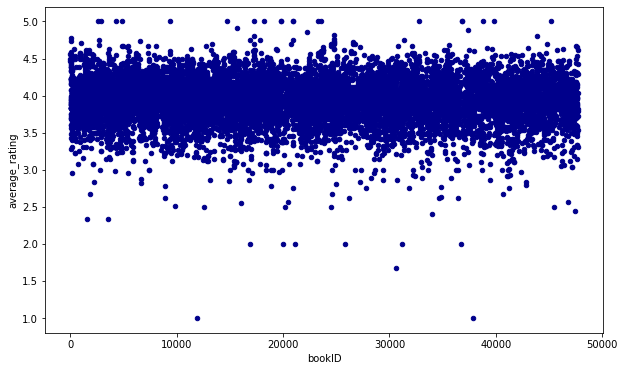

In [22]:
# bookID vs average_rating
ax = books_new.plot.scatter(x='bookID',y='average_rating',
                            figsize=(10, 6),
                            color='DarkBlue')

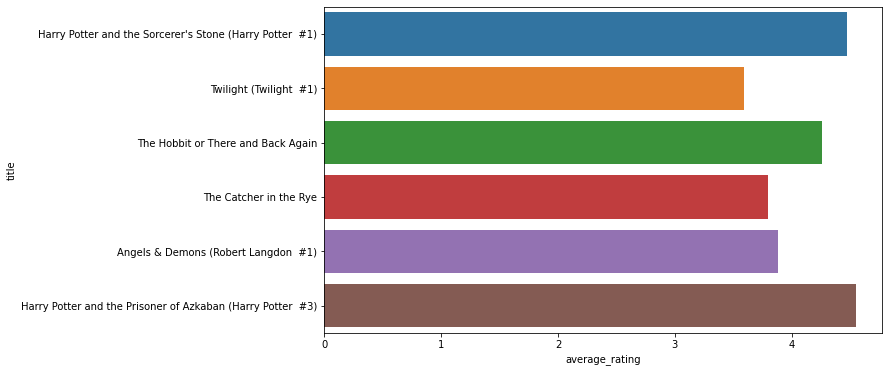

In [23]:
# average_rating vs book_title
plot = books_new.sort_values(by=['ratings_count'], ascending = False).head(6)
plt.figure(figsize=(10,6))
ax = sns.barplot(x="average_rating", y="title", data=plot)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

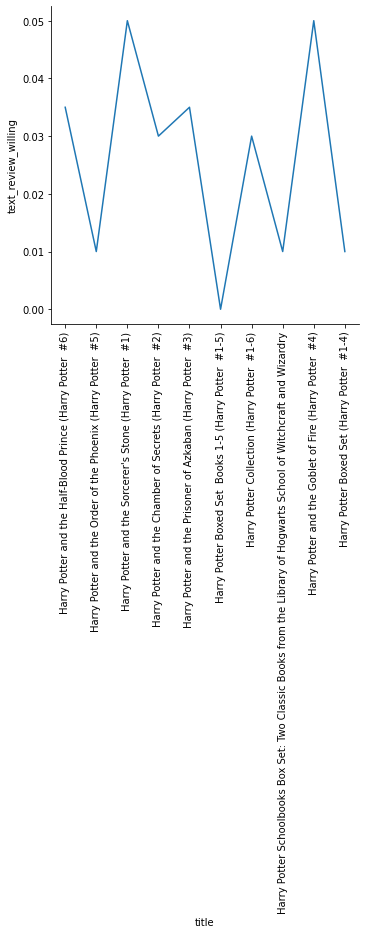

In [25]:
# text_review_willing from JK Rowling's
plot2 = books_new[books_new["authors"].isin(["J.K. Rowling"])]
sns.relplot(
    data=plot2, kind="line",
    x="title", y="text_review_willing",ci=None)
plt.xticks(rotation=90)

In [26]:
# authors distribution from top 50 rating books
plot4 = books_new.sort_values(by=['average_rating'], ascending = False).head(40)
a =plot4.authors.value_counts()
a

Bill Watterson                                          6
J.K. Rowling                                            2
NOT A BOOK                                              2
Simon Cleveland                                         1
Alice Wong-Lena Tabori                                  1
Mary B. Collins                                         1
Richard P. Feynman                                      1
Paul Foster Case                                        1
Ross Garnaut                                            1
John  Diamond                                           1
Elizabeth George                                        1
Elena N. Mahlow                                         1
Don Macmillan-Wayne G. Broehl Jr.                       1
Henry David Thoreau-Barry M. Andrews                    1
Xavier de C.-Xavier de C.-Joseph Rowe                   1
Saul Leiter-Martin Harrison                             1
Middlesex Borough Heritage Committee                    1
Chris    Green

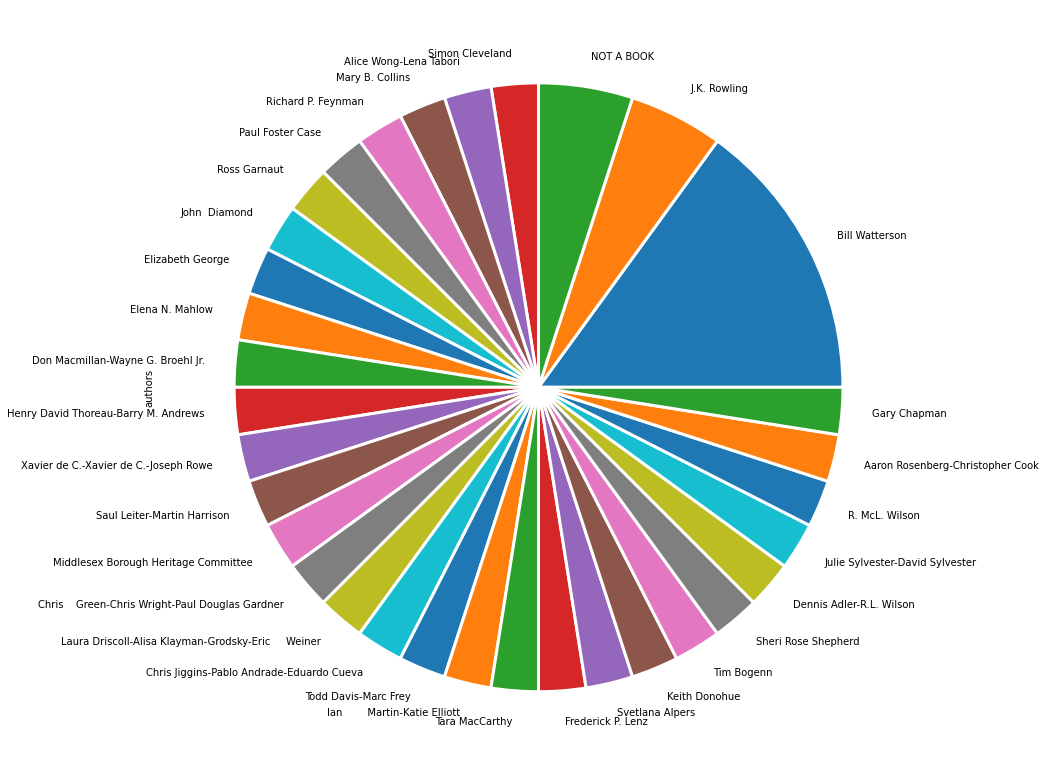

In [32]:
plt.figure(figsize=(16,14))
a.plot(kind='pie',labeldistance=1.1, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

#### Cluster analysis

In [34]:
sbs = books_new.drop(columns=['bookID','title', 'authors','isbn','isbn13','language_code','num_pages','text_review_willing','average_rating(%)'])
scaler = StandardScaler()
scaled = scaler.fit_transform(sbs)
normalized = normalize(scaled)
  
# Converting the numpy array into a pandas DataFrame
normalized = pd.DataFrame(normalized)
pca = PCA(n_components = 3)
pca_data = pca.fit_transform(normalized)
pca_data = pd.DataFrame(pca_data)
pca_data.columns = ['P1', 'P2','P3']

In [36]:
clustering = AgglomerativeClustering().fit(sbs)
clustering
AgglomerativeClustering()
clustering.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [37]:
Z = linkage(sbs, 'average')
k=5
dend_clusters = fcluster(Z, k, criterion='maxclust')
dend_clusters
for i in range(1, k):
    print("\nCluster", i)
    display(sbs[dend_clusters == i])


Cluster 1


,ratings_count,text_reviews_count,average_rating
2,5629932,70390,4.47



Cluster 2


,ratings_count,text_reviews_count,average_rating
12243,4367341,93619,3.59



Cluster 3


,ratings_count,text_reviews_count,average_rating
0,1944099,26249,4.56
1,1996446,27613,4.49
4,2149872,33964,4.55
25,2009749,12784,4.35
313,1592632,54668,3.85
324,1654353,23959,3.86
330,1301305,19452,4.10
340,2279854,20851,3.88
343,1588890,35316,3.82
664,1402458,15525,4.06



Cluster 4


,ratings_count,text_reviews_count,average_rating
3,6267,272,4.41
5,38872,154,4.78
6,18,1,3.69
7,27410,820,4.73
8,3602,258,4.38
...,...,...,...
13709,11317,1060,3.82
13710,8710,361,3.72
13711,14334,1485,3.53
13712,1550,38,4.43


Text(0.5, 1.0, 'K Curve')

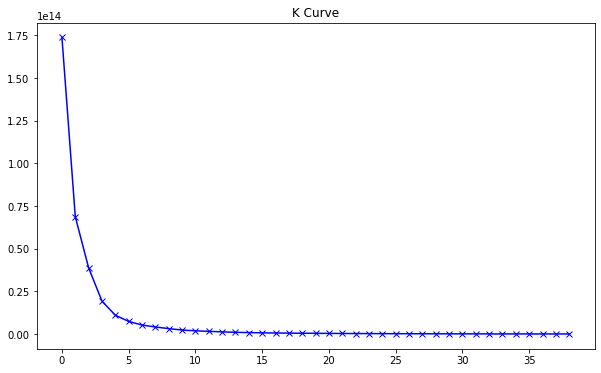

In [39]:
Xy = books_new[['text_reviews_count', 'ratings_count']]
Yx = np.asarray([np.asarray(Xy['text_reviews_count']), np.asarray(Xy['ratings_count'])]).T
from sklearn.cluster import KMeans
distortions = []
for k in range(1,40):
    k_means = KMeans(n_clusters = k)
    k_means.fit(Yx)
    distortions.append(k_means.inertia_)
fig = plt.figure(figsize=(10,6))
plt.plot(distortions, 'bx-')
plt.title("K Curve")

(array([     5,     15,     25, ..., 122175, 122185, 122195]),
 <a list of 12220 Text major ticklabel objects>)

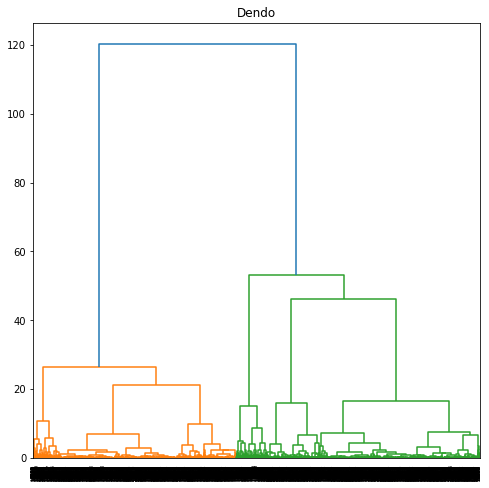

In [41]:
plt.figure(figsize =(8, 8))
plt.title('Dendo')
Dendrogram = shc.dendrogram((shc.linkage(pca_data, method ='ward')))
plt.xticks(rotation=90)

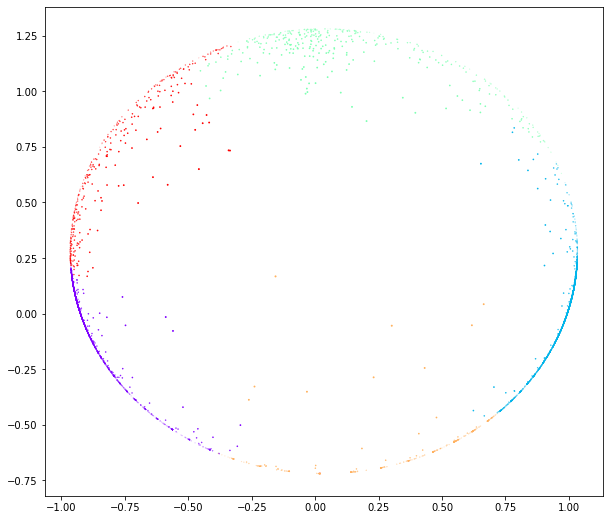

In [47]:
K5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(10, 9))
plt.scatter(pca_data['P1'], pca_data['P2'], pca_data['P3'],
            c = K5.fit_predict(pca_data), cmap ='rainbow')
plt.show()

In [45]:
X = pca_data[['P1', 'P2', 'P3']]
pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=books_new['bookID'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PCA 1', '1': 'PCA 2', '2': 'PCA 3'}
)
fig.show()

#### Unsupervised clustering

In [48]:
books_new2 = books_new[["average_rating", "ratings_count", "text_reviews_count"]]
books_new3 = books_new2.sort_values(by=['ratings_count'], ascending = False).head(60)
books_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2 to 8748
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      60 non-null     float64
 1   ratings_count       60 non-null     int64  
 2   text_reviews_count  60 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.9 KB


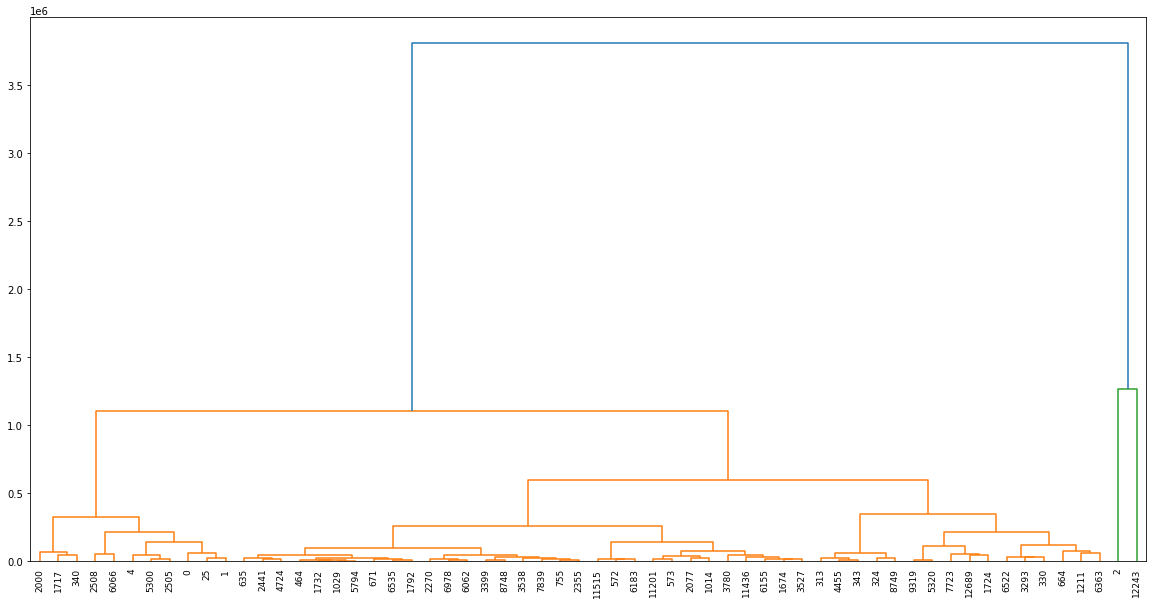

In [49]:
Z = linkage(books_new3, 'average')
plt.figure(figsize=(20, 10))
D = dendrogram(Z=Z, orientation="top", leaf_font_size=9, labels = books_new3.index)

In [50]:
model = KMeans(n_clusters = 3)
model.fit(books_new3)

KMeans(n_clusters=3)

In [51]:
model.labels_

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Text(0, 0.5, 'text_reviews_count')

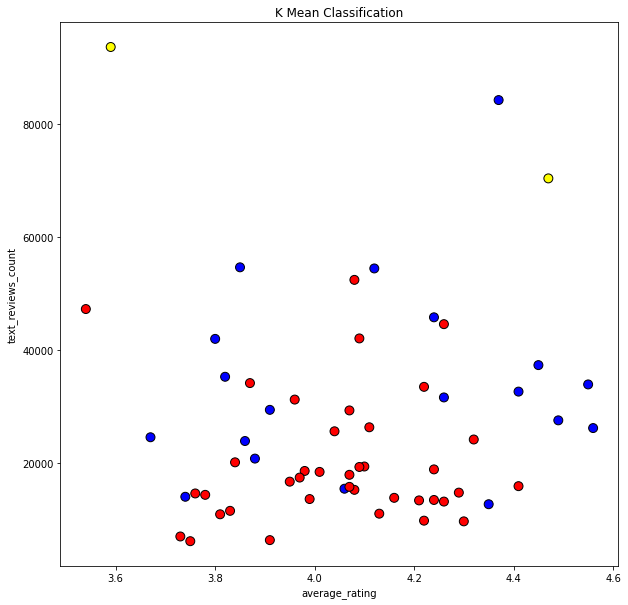

In [52]:
fig = plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'blue','yellow', 'green'])
plt.scatter(books_new3.average_rating, books_new3.text_reviews_count, c=colormap[model.labels_], edgecolor = 'black', s = 80)
plt.title('K Mean Classification')
plt.xlabel('average_rating')
plt.ylabel('text_reviews_count')

Text(0.5, 0.92, 'K Means')

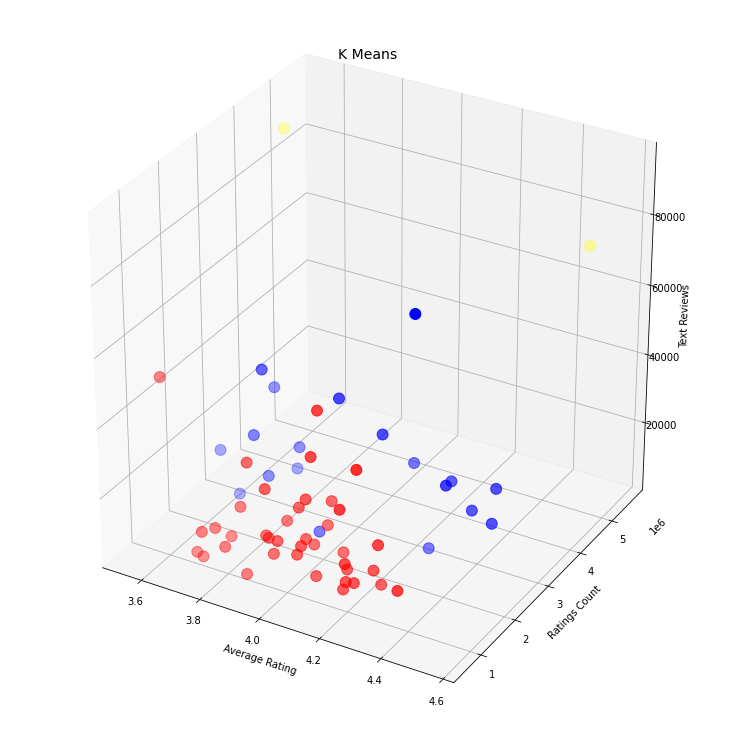

In [53]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=-60)
colormap = np.array(['red', 'blue','yellow', 'green'])
ax.scatter(books_new3.average_rating, books_new3.ratings_count, books_new3.text_reviews_count,
          c=colormap[model.labels_], s=120)
ax.set_xlabel("Average Rating")
ax.set_ylabel("Ratings Count")
ax.set_zlabel("Text Reviews")
plt.title("K Means", fontsize=14)

#### Recommendation engine

In [56]:
# Calculate mean 
A = books['average_rating'].mean()
# Minimum number of ratings count
B = books['ratings_count'].quantile(0.90)
# New DF for books in the range of quantile(0.90)
C = books.copy().loc[books['average_rating'] >= B]
# Function computing weighted rating
def weighted_rating(x, m=B, C=A):
    v = x['ratings_count']
    R = x['average_rating']
    return (v/(v+B) * R) + (m/(B+v) * A)
# 'Score' as the new feature in DF
books['score'] = books.apply(weighted_rating, axis=1)
# Books based on Score 
books = books.sort_values('score', ascending=False)
# Top 10 books
books[['title', 'ratings_count', 'average_rating', 'score']].head(10)
# TF-IDF used.
tfidf = TfidfVectorizer(stop_words='english')
# empty string in place of NA
books['authors'] = books['authors'].fillna('')
# Transforming the data
tfidf_matrix = tfidf.fit_transform(books['authors'])
# Feature name.
tfidf.get_feature_names()[5000:5010]
# Cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
# Incices
indices = pd.Series(books.index, index=books['title']).drop_duplicates()
indices[:10]

title
Harry Potter and the Half-Blood Prince (Harry Potter  #6)                    0
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)                  4
The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury            12534
The Return of the King (The Lord of the Rings  #3)                        6187
Harry Potter and the Order of the Phoenix (Harry Potter  #5)                 1
Harry Potter and the Sorcerer's Stone (Harry Potter  #1)                     2
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings       22
Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)                       5
A Game of Thrones (A Song of Ice and Fire  #1)                            4455
The Complete Calvin and Hobbes                                            7922
dtype: int64

In [57]:
# Function which outputs similar books, using score
def BN_Recommends(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    books_indices = [i[0] for i in sim_scores]
    return  books['title'].iloc[books_indices]

In [58]:
BN_Recommends('The Complete Calvin and Hobbes')

7064                   Strange Pilgrims
7065            Doce cuentos peregrinos
1475            Living to Tell the Tale
281           Del amor y otros demonios
279     Crónica de una muerte anunciada
1476               Cien años de soledad
7620                Vivir para contarla
2494      One Hundred Years Of Solitude
280                Cien años de soledad
155                Cien años de soledad
Name: title, dtype: object

In [61]:
BN_Recommends('In a Sunburned Country')

148                                      Treasure Island
208                    Ghosts (The New York Trilogy  #2)
217                                            Leviathan
307    Harrington on Hold 'em: Expert Strategy for No...
315    Fullmetal Alchemist  Vol. 3 (Fullmetal Alchemi...
319    The Illustrated Alchemist: A Fable about Follo...
356                                  Think and Grow Rich
364                                                 1776
373                       Snow Flower and the Secret Fan
418                            How to Succeed with Women
Name: title, dtype: object